In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils import data
from torchvision import datasets, transforms

from lib.dataset import PCam
from lib.models import Veggie16

In [2]:
DATASET_PATH = '../data'

In [3]:
image_dir = os.path.join(DATASET_PATH, 'train')
csv_path = os.path.join(DATASET_PATH, 'train_labels.csv')
pcam_dataset = PCam(image_dir, csv_path, transforms.Compose([transforms.ToTensor()]))
train_loader = data.DataLoader(pcam_dataset, batch_size=4, num_workers=0)

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

Device: cpu


In [5]:
learning_rate = 0.001

In [6]:
model = Veggie16(2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

tensor([[0.4891, 0.5109],
        [0.5154, 0.4846],
        [0.5102, 0.4898],
        [0.5197, 0.4803]])


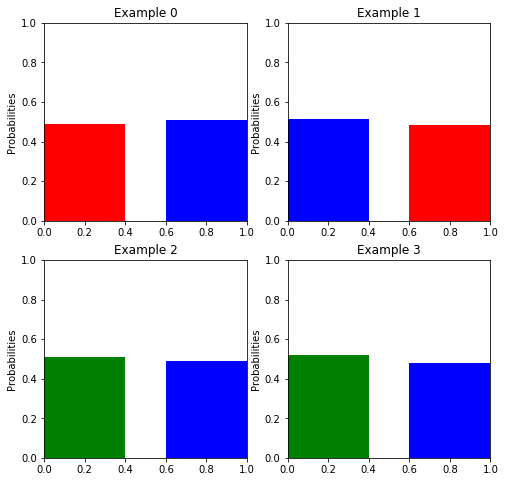

In [22]:
model.eval()

with torch.no_grad():
    images, labels = next(iter(train_loader))
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    predictions = torch.argmax(outputs, dim=1)
    print(outputs)

    with torch.no_grad():
        fig, ax = plt.subplots(2, 2, figsize=(8,8))
        ax = ax.flatten()
        for i in range(len(labels)):
            ax[i].set_title(f'Example {i}')
            y = labels[i]
            colors = ['b','b']
            colors[y] = 'g' if predictions[i] == y else 'r'
            ax[i].bar([0,1], height=outputs[i], color=colors)
            ax[i].set_xlim([0, 1])
            ax[i].set_ylim([0, 1])
            ax[i].set_ylabel('Probabilities')
